# Module 03

### Exercise 3a  Saving and loading data
*Relevant sections: 3.1.2, 3.1.3*

Use YAML or JSON to save your maze data structure to disk and load it again.

The maze would have looked something like this:

In [1]:
house = {
    "living": {
        "exits": {"north": "kitchen", "outside": "garden", "upstairs": "bedroom"},
        "people": ["James"],
        "capacity": 2,
    },
    "kitchen": {"exits": {"south": "living"}, "people": [], "capacity": 1},
    "garden": {"exits": {"inside": "living"}, "people": ["Sue"], "capacity": 3},
    "bedroom": {
        "exits": {"downstairs": "living", "jump": "garden"},
        "people": [],
        "capacity": 1,
    },
}

### Exercise 3a Answer

**Save as json or yaml**

In [2]:
import json
import yaml

In [3]:
with open('myfile.json', 'w') as f:
    json.dump(house, f)

In [4]:
with open("myotherfile.json", "w") as json_maze_out:
    json_maze_out.write(json.dumps(house))

In [5]:
with open('myfile.yml', 'w') as f:
    yaml.safe_dump(house, f, default_flow_style=False)

In [6]:
with open("myotherfile.yaml", "w") as yaml_maze_out:
    yaml_maze_out.write(yaml.dump(house))

**Loading with json or yaml**

In [7]:
with open("myfile.json", "r") as f:
    mydataasstring = f.read()
my_json_data = json.loads(mydataasstring)
print(my_json_data["living"])

{'exits': {'north': 'kitchen', 'outside': 'garden', 'upstairs': 'bedroom'}, 'people': ['James'], 'capacity': 2}


In [8]:
with open("myotherfile.json") as json_maze_in:
    maze_again = json.load(json_maze_in)
print(maze_again["living"])

{'exits': {'north': 'kitchen', 'outside': 'garden', 'upstairs': 'bedroom'}, 'people': ['James'], 'capacity': 2}


In [9]:
with open("myfile.yaml", "r") as f:
    my_yaml_data = yaml.safe_load(f)
print(my_yaml_data["living"])

{'exits': {'north': 'kitchen', 'outside': 'garden', 'upstairs': 'bedroom'}, 'people': ['James'], 'capacity': 2}


In [10]:
with open("myotherfile.yaml") as yaml_maze_in:
    maze_again = yaml.safe_load(yaml_maze_in)
print(maze_again["living"])

{'capacity': 2, 'exits': {'north': 'kitchen', 'outside': 'garden', 'upstairs': 'bedroom'}, 'people': ['James']}


### Exercise 3b Plotting with matplotlib

Generate two plots, next to each other (on the same row).

The first plot should show sin(x) and cos(x) for the range of x between -1 pi and +1 pi. 

The second plot should show sin(x), cos(x) and the sum of sin(x) and cos(x) over the same -pi to +pi range. Set suitable limits on the axes and pick colours, markers, or line-styles that will make it easy to differentiate between the curves. Add legends to both axes.

### Exercise 3b Answer

(-1.5, 1.5)

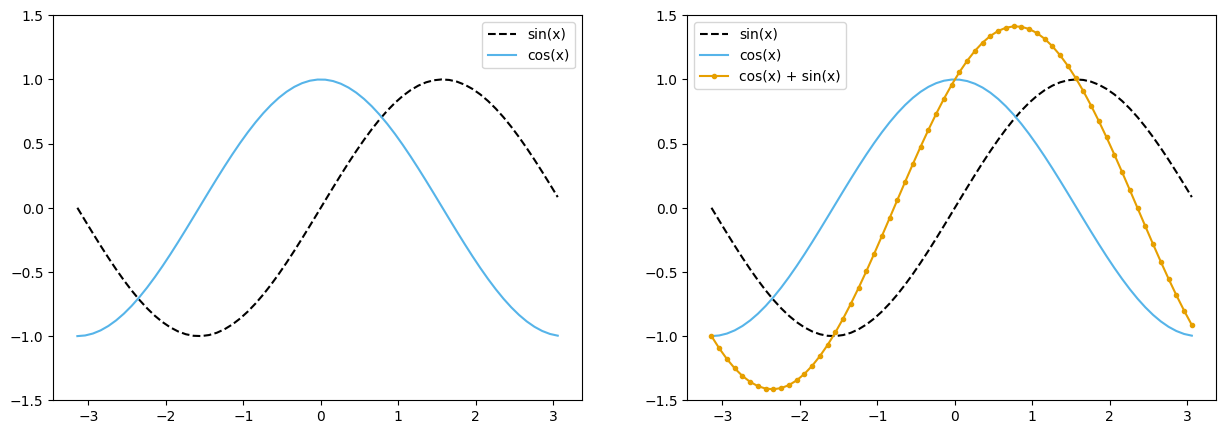

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to get the range of x values (math should work too)
x = np.arange(-np.pi, np.pi, 0.1)

# Define figure dimensions
fig = plt.figure(figsize=(15,5))


ax1 = fig.add_subplot(1,2,1)
ax1.plot(x, np.sin(x),label="sin(x)",color='black', linestyle='dashed')
ax1.plot(x, np.cos(x),label="cos(x)", color='#56B4E9')
ax1.legend()
ax1.set_ylim(-1.5, 1.5)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x, np.sin(x),label="sin(x)",color='black', linestyle='dashed')
ax2.plot(x, np.cos(x),label="cos(x)", color='#56B4E9')
ax2.plot(x, np.cos(x)+np.sin(x), label='cos(x) + sin(x)', color='#E69F00', marker=".")
ax2.legend()
ax2.set_ylim(-1.5, 1.5)


### Exercise 3c The biggest earthquake in the UK this century

### The Problem
`GeoJSON` is a json-based file format for sharing geographic data. One example dataset is the USGS earthquake data:

In [12]:
import requests

quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2021-01-19",
        "orderby": "time-asc",
    },
)

In [13]:
quakes.text[0:100]

'{"type":"FeatureCollection","metadata":{"generated":1664361243000,"url":"https://earthquake.usgs.gov'

### Exercise 3c Answer
*Relevant sections: 3.1, 2.5.2, 2.5.1*

### Load the data
* Get the text of the web result
* Parse the data as JSON

In [14]:
import requests
quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2021-08-14", # Change the date to yesterday
        "orderby": "time-asc",
    },
)

In [15]:
import json
# Can get the data indirectly via the text and then load json text....
my_quake_data = json.loads(quakes.text) # Section 3.1 - structured data

# Requests also has a built in json parser
requests_json = quakes.json()

### Investigate the data
* Understand how the data is structured into dictionaries and lists
   * Where is the magnitude?
   * Where is the place description or coordinates?

There is no foolproof way of doing this. A good first step is to see the type of our data!

In [16]:
type(requests_json)

dict

Now we can navigate through this dictionary to see how the information is stored in the nested dictionaries and lists. The `keys` method can indicate what kind of information each dictionary holds, and the `len` function tells us how many entries are contained in a list. How you explore is up to you!

In [17]:
requests_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [18]:
type(requests_json["features"])

list

In [19]:
len(requests_json["features"])

128

In [20]:
requests_json["features"][0]

{'type': 'Feature',
 'properties': {'mag': 2.6,
  'place': '12 km NNW of Penrith, United Kingdom',
  'time': 956553055700,
  'updated': 1415322596133,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 104,
  'net': 'us',
  'code': 'p0009rst',
  'ids': ',usp0009rst,',
  'sources': ',us,',
  'types': ',impact-text,origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': None,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'},
 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
 'id': 'usp0009rst'}

In [21]:
requests_json["features"][0].keys()

dict_keys(['type', 'properties', 'geometry', 'id'])

It looks like the coordinates are in the `geometry` section and the magnitude is in the `properties` section.

In [22]:
requests_json["features"][0]["geometry"]

{'type': 'Point', 'coordinates': [-2.81, 54.77, 14]}

In [23]:
requests_json["features"][0]["properties"].keys()

dict_keys(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type', 'title'])

In [24]:
requests_json["features"][0]["properties"]["mag"]

2.6

### Search through the data
* Program a search through all the quakes to find the biggest quake
* Find the place of the biggest quake

In [25]:
quakes = requests_json["features"]

In [26]:
largest_so_far = quakes[0]
for quake in quakes:
    if quake["properties"]["mag"] > largest_so_far["properties"]["mag"]:
        largest_so_far = quake
largest_so_far["properties"]["mag"]

4.8

In [27]:
lon = largest_so_far["geometry"]["coordinates"][0]
lat = largest_so_far["geometry"]["coordinates"][1]

print(f"Latitude: {lat} Longitude: {lon}")

Latitude: 52.52 Longitude: -2.15


### Visualise your answer
* Form a URL for an online map service at that latitude and longitude: look back at the introductory example
* Display that image

In [28]:
import IPython
import requests

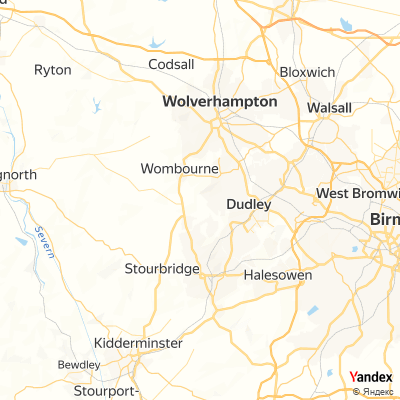

In [29]:
# This is a solution to one of the questions in module 2
# The only difference here is that the map type is set to map rather than satellite view and the zoom is 10 not 12
def op_response(lat, lon):
    response = requests.get(
    "https://static-maps.yandex.ru:443/1.x",
        params={
            "size": "400,400",  # size of map
            "ll": str(lon) + "," + str(lat),  # longitude & latitude of centre
            "z": 10,  # zoom level
            "l": "map",  # map layer (map image)
            "lang": "en_US",  # language
            },
        )
    return response.content

    
op = op_response(lat, lon)

IPython.core.display.Image(op)

Note - in this in this instance Pandas probably isn't the first thing that you would use as we have nested dictionaries and json works very well in such cases